<a href="https://colab.research.google.com/github/JunaidMovar/ML-DL-Learning/blob/master/Muffin_Or_Chihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.2

     |████████████████████████████████| 516.2MB 29kB/s 


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2 
import numpy as np

In [ ]:
!git clone https://github.com/ieee8023/deep-learning-datasets.git
os.chdir('/content/deep-learning-datasets/chihuahua-muffin')
!rm README.md full.jpg

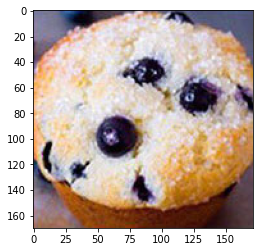

In [ ]:
Data = os.listdir() 
plt.imshow(plt.imread(Data[0]))
plt.show()

In [ ]:
def Dataset_Maker():
  X,Y = [],[]
  for _ in os.listdir():
    #print(_.lower().split('.')[0])
    if _.lower().split('.')[0] != 'full':
      X.append(cv2.resize((plt.imread(_)),(150,150),cv2.INTER_AREA))
      print(cv2.resize((cv2.imread(_)),(150,150),cv2.INTER_AREA).shape)
      Y.append(_.lower().split('.')[0][:-2])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y.reshape(-1,1)

X,Y = Dataset_Maker()

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


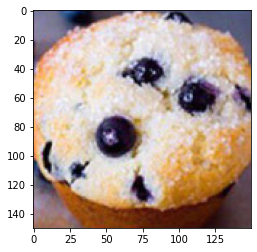

In [ ]:
plt.imshow(X[0][:])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
Enc = OneHotEncoder()
Y = Enc.fit_transform(Y).toarray()
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout,DepthwiseConv2D
from tensorflow.keras.optimizers import *

In [ ]:
np.random.seed(1)
Model = Sequential([
    Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'),
    BatchNormalization(),
    MaxPool2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPool2D((2,2)),

    Flatten(),

    Dense(128,activation='relu'),
    Dense(2,activation='softmax')
])
Model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 82944)            

In [ ]:
Model.fit(X,Y,validation_split=0.10,epochs=10,batch_size=4)

Epoch 1/10
4/4 [==============================] - 1s 214ms/step - loss: 45.6169 - accuracy: 0.8571 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 1s 218ms/step - loss: 5.9111 - accuracy: 0.9286 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 1s 224ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 219ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 227ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 221ms/step - loss: 0.3065 - accuracy: 0.9286 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 220ms/step - loss: 4.2111 - accuracy: 0.9286 - val_loss: 0.0000e+00 - 

In [ ]:
Model.evaluate(X,Y)

1/1 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

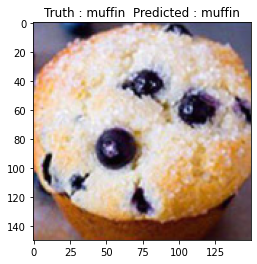

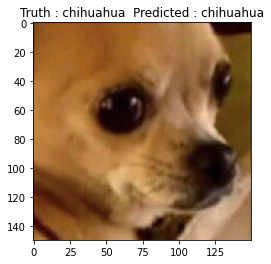

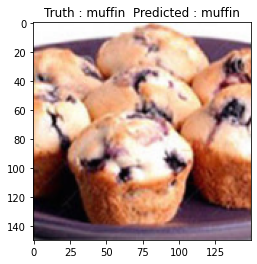

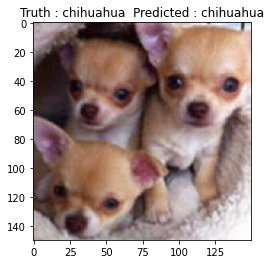

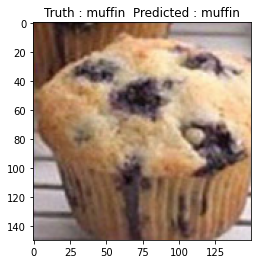

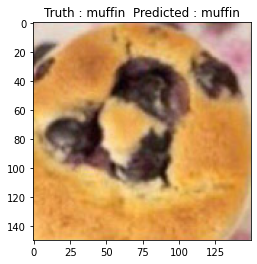

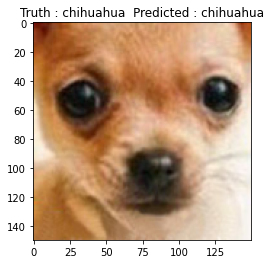

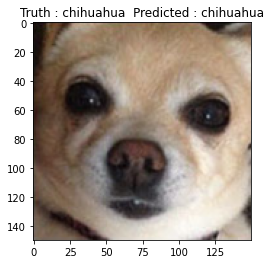

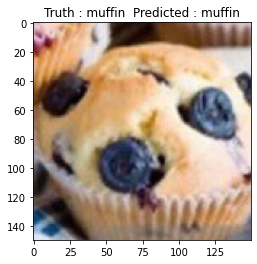

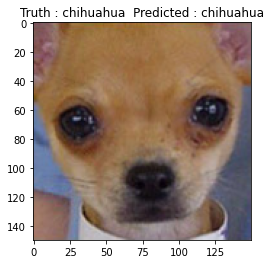

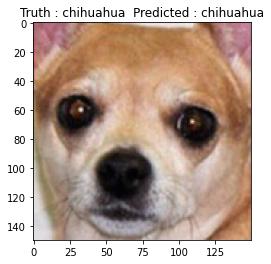

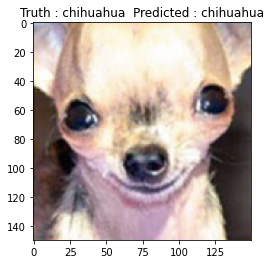

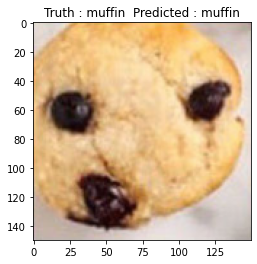

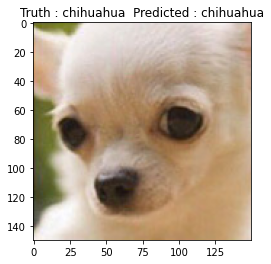

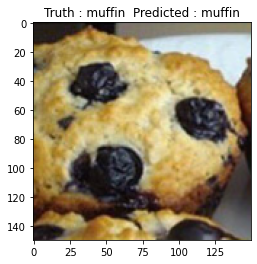

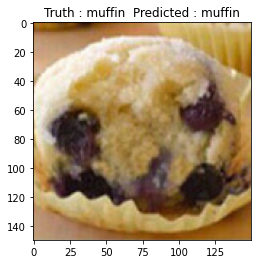

In [ ]:
for _ in range(len(X)):
  plt.imshow(X[_])
  plt.title('Truth : ' + Enc.inverse_transform(Y[_].reshape(1,-1))[0][0] + '  Predicted : ' + Enc.inverse_transform(Model.predict(X[_].reshape(1,150,150,3)))[0][0])
  plt.show()
  